<a href="https://colab.research.google.com/github/akashbauri/Automobile-Analysis/blob/object_detection/project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
#load the liberay

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape # there is 60000 images

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

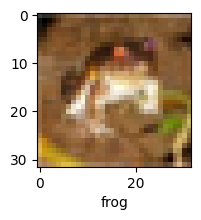

In [ ]:
plot_sample(X_train, y_train, 0)

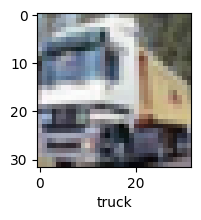

In [ ]:
plot_sample(X_train, y_train, 1) #

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0 #Normalizing the training data

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 89s 56ms/step - loss: 1.8145 - accuracy: 0.3523
Epoch 2/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6234 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5418 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4821 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4325 - accuracy: 0.4961


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.46      0.52      1000
           1       0.66      0.48      0.56      1000
           2       0.37      0.32      0.35      1000
           3       0.40      0.21      0.28      1000
           4       0.39      0.46      0.42      1000
           5       0.38      0.39      0.39      1000
           6       0.51      0.57      0.54      1000
           7       0.59      0.53      0.56      1000
           8       0.36      0.83      0.50      1000
           9       0.64      0.36      0.46      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.46     10000
weighted avg       0.49      0.46      0.46     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 1.4973 - accuracy: 0.4575
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1318 - accuracy: 0.6026
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9994 - accuracy: 0.6545
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9190 - accuracy: 0.6811
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8540 - accuracy: 0.7045
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8011 - accuracy: 0.7212
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7567 - accuracy: 0.7361
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7136 - accuracy: 0.7508
Epoch 9/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6760 - accuracy: 0.7638
Epoch 10/10
1563/1563 [==============================] - 42s 27m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9335 - accuracy: 0.6909


[0.9335437417030334, 0.6909000277519226]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[3.6867859e-04, 7.5800571e-04, 7.7604823e-04, 8.7122703e-01,
        5.9320999e-04, 5.5670999e-02, 1.1303750e-02, 1.2581829e-04,
        5.8865070e-02, 3.1138529e-04],
       [2.0534659e-02, 1.6823821e-01, 5.1007260e-06, 2.7070317e-07,
        4.7225877e-09, 1.2128607e-09, 9.5152473e-09, 1.0373120e-09,
        8.1099707e-01, 2.2471262e-04],
       [4.0175330e-02, 6.2926137e-01, 7.3637703e-04, 3.7063009e-03,
        1.8136109e-03, 1.9109248e-04, 1.4235839e-04, 2.7385226e-03,
        2.0055784e-01, 1.2067730e-01],
       [9.0893763e-01, 6.3920438e-02, 6.2697072e-04, 2.7225771e-05,
        4.3705190e-03, 5.4215025e-07, 1.3617462e-05, 3.4878227e-05,
        2.1988910e-02, 7.9239413e-05],
       [1.7635798e-06, 2.3173388e-05, 1.2312775e-02, 3.8937432e-01,
        1.8589291e-01, 2.7989240e-02, 3.8434833e-01, 2.2278127e-05,
        3.4106066e-05, 1.1187909e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 3]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

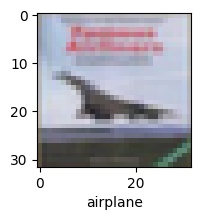

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

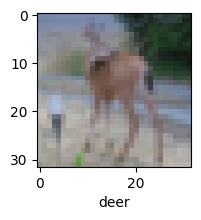

In [ ]:
plot_sample(X_test, y_test,100)

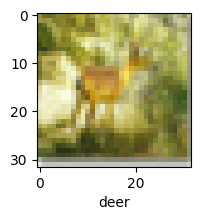

In [ ]:
plot_sample(X_test, y_test,500)

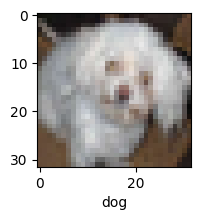

In [ ]:
plot_sample(X_test, y_test,1000)